In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
df=pd.read_csv('Algerian_forest_fires.csv',header=1)
df.head()
df_copy=df.copy(deep=True)
df_copy.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
5,06,06,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire
6,07,06,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire
7,08,06,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire
8,09,06,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire
9,10,06,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [4]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [5]:
# Columns which has null values
df[df.isnull().any(axis=1)]


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [6]:
df.loc[:121,'Region']='Bejaia'
df.loc[124:,'Region']='Sidi_Bel_Abbes'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       244 non-null    object
dtypes: object(15)
memory usage: 29.0+ KB


In [7]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,Sidi_Bel_Abbes


In [8]:
df.drop([122,123],inplace=True)
df.reset_index(drop=True, inplace=True)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bejaia
5,06,06,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire,Bejaia
6,07,06,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire,Bejaia
7,08,06,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire,Bejaia
8,09,06,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,Bejaia
9,10,06,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,Bejaia


In [9]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
165,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,Sidi_Bel_Abbes


In [10]:
df.loc[165,['DC','ISI','BUI','FWI','Classes']]=[14.6,9,12.5,10.4,'fire']
df.loc[165]

day                        14
month                      07
year                     2012
Temperature                37
 RH                        37
 Ws                        18
Rain                      0.2
FFMC                     88.9
DMC                      12.9
DC                       14.6
ISI                         9
BUI                      12.5
FWI                      10.4
Classes                   NaN
Region         Sidi_Bel_Abbes
Classes                  fire
Name: 165, dtype: object

In [11]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region', 'Classes'],
      dtype='object')

In [12]:
df.drop('Classes',axis=1,inplace=True)
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [13]:
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [14]:
df.loc[165,['DC','ISI','BUI','FWI','Classes']]=[14.6,9,12.5,10.4,'fire']
df.loc[165]

day                        14
month                      07
year                     2012
Temperature                37
RH                         37
Ws                         18
Rain                      0.2
FFMC                     88.9
DMC                      12.9
DC                       14.6
ISI                         9
BUI                      12.5
FWI                      10.4
Classes                  fire
Region         Sidi_Bel_Abbes
Name: 165, dtype: object

In [15]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bejaia


In [16]:
df[['month', 'day', 'year', 'Temperature','RH', 'Ws']] = df[['month', 'day', 'year', 'Temperature','RH', 'Ws']].astype(int)

In [17]:
obj_col= [var for var in df.columns if df[var].dtypes=='O']
obj_col

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region']

In [18]:
for i in obj_col:
    if i not in ('Classes','Region'):
        df[i] = df[i].astype(float)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
 14  Region       244 non-null    object 
dtypes: float64(7), int32(6), object(2)
memory usage: 23.0+ KB


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,244.0,15.754098,8.825059,1.0,8.000,16.00,23.000,31.0
month,244.0,7.500000,1.112961,6.0,7.000,7.50,8.000,9.0
year,244.0,2012.000000,0.000000,2012.0,2012.000,2012.00,2012.000,2012.0
Temperature,244.0,32.172131,3.633843,22.0,30.000,32.00,35.000,42.0
RH,244.0,61.938525,14.884200,21.0,52.000,63.00,73.250,90.0
Ws,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,14.673361,12.368039,0.7,5.800,11.30,20.750,65.9
DC,244.0,49.288115,47.619662,6.9,13.275,33.10,68.150,220.4


In [21]:
for col in df.columns:
    print(df[col].value_counts(sort=True))

1     8
17    8
30    8
29    8
28    8
27    8
26    8
25    8
24    8
23    8
22    8
21    8
20    8
19    8
18    8
16    8
2     8
15    8
14    8
13    8
12    8
11    8
10    8
9     8
8     8
7     8
6     8
5     8
4     8
3     8
31    4
Name: day, dtype: int64
7    62
8    62
6    60
9    60
Name: month, dtype: int64
2012    244
Name: year, dtype: int64
35    29
31    25
34    24
33    23
30    22
32    21
36    21
29    18
28    15
37     9
27     8
25     6
39     6
26     5
24     3
38     3
40     3
22     2
42     1
Name: Temperature, dtype: int64
64    10
55    10
58     8
54     8
78     8
68     7
66     7
73     7
80     7
65     7
63     6
59     6
81     6
56     6
76     6
62     5
71     5
53     5
70     5
75     5
48     4
45     4
51     4
69     4
52     4
49     4
42     4
87     4
79     4
37     4
67     4
43     4
41     3
44     3
34     3
57     3
60     3
89     3
77     3
61     3
50     3
47     3
82     3
86     3
88     3
40     2
33     2
74     

0.4     12
0.8     10
0.5      9
0.1      9
0.0      9
0.3      8
0.9      7
0.2      6
0.7      5
0.6      4
7.7      3
4.2      3
6.3      3
3.2      3
1.7      3
3.9      3
5.9      3
2.2      3
2.5      3
21.6     2
9.0      2
15.3     2
10.7     2
6.1      2
9.9      2
3.0      2
5.2      2
18.4     2
1.3      2
1.2      2
20.9     2
13.7     2
13.2     2
3.1      2
1.0      2
7.3      2
15.7     2
4.9      2
6.0      2
12.9     2
2.8      2
6.8      2
8.0      2
3.8      2
15.0     2
5.6      2
10.6     2
10.9     2
7.2      2
7.1      2
16.3     1
17.3     1
13.0     1
19.3     1
12.7     1
17.5     1
12.6     1
25.4     1
30.0     1
15.4     1
19.5     1
13.5     1
15.2     1
14.5     1
19.4     1
18.8     1
10.3     1
2.7      1
16.0     1
26.1     1
3.7      1
14.1     1
30.3     1
31.1     1
26.9     1
24.5     1
9.8      1
5.7      1
18.1     1
12.2     1
26.3     1
24.0     1
14.8     1
5.5      1
10.5     1
9.1      1
19.9     1
10.4     1
8.8      1
10.2     1
12.1     1

In [22]:
for col in df.columns:
    print(col,'=', df[col].nunique())

day = 31
month = 4
year = 1
Temperature = 19
RH = 62
Ws = 18
Rain = 39
FFMC = 173
DMC = 166
DC = 198
ISI = 106
BUI = 173
FWI = 126
Classes = 8
Region = 2


In [23]:
df.Classes.value_counts()

fire             131
not fire         101
fire               5
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [24]:
df.Classes = df.Classes.str.strip()

In [25]:
df.Classes.value_counts()

fire        138
not fire    106
Name: Classes, dtype: int64

In [26]:
df.to_csv('Algerian_forest_fires_CLEANED.csv', index=False)

In [27]:
#Droping Year features 
df1 = df.drop(['day','month','year'], axis=1)

In [28]:
# Encoding Not fire as 0 and Fire as 1
df1['Classes']= np.where(df1['Classes']== 'not fire',0,1)
df1['Region']=np.where(df1['Region']=='Bejaia',1,2)
df1

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
5,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,1
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,1
7,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,1
8,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0,1
9,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0,1


In [29]:
df1.Classes.dtype,df1.Region.dtype

(dtype('int32'), dtype('int32'))

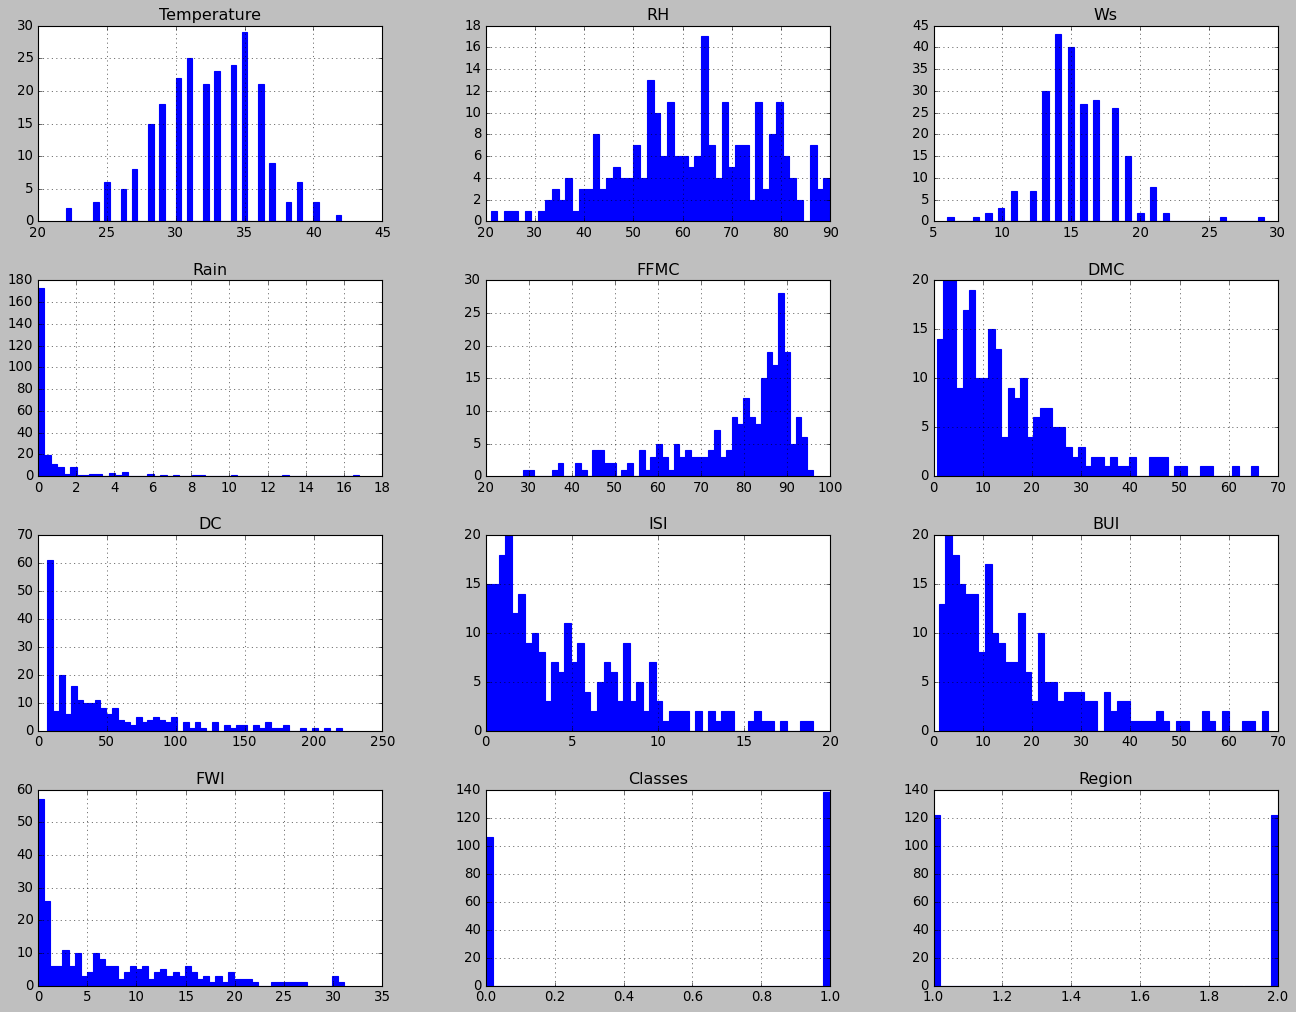

In [30]:
# PLot density plot for all features
plt.style.use('classic')
df1.hist(bins=50, figsize=(20,15), ec = 'b')
plt.show()


In [31]:
# Percentage for PieChart
percentage = df.Classes.value_counts(normalize=True)*100
percentage

fire        56.557377
not fire    43.442623
Name: Classes, dtype: float64

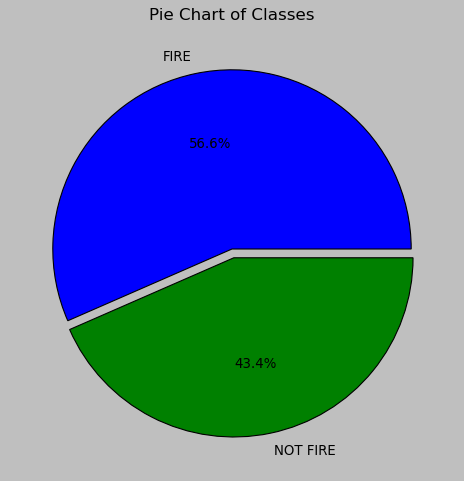

In [32]:
#plotting PieChart
classeslabels = ["FIRE", "NOT FIRE"]
plt.figure(figsize =(12, 7))
plt.pie(percentage,labels = classeslabels,autopct='%1.1f%%',explode=[0,0.05])  
plt.title ("Pie Chart of Classes", fontsize = 15)
plt.show()


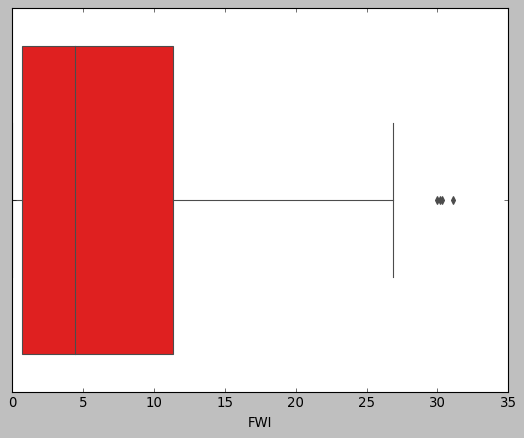

In [33]:
#Boxplot
ax= sns.boxplot(df['FWI'], color= 'red',linewidth=1)

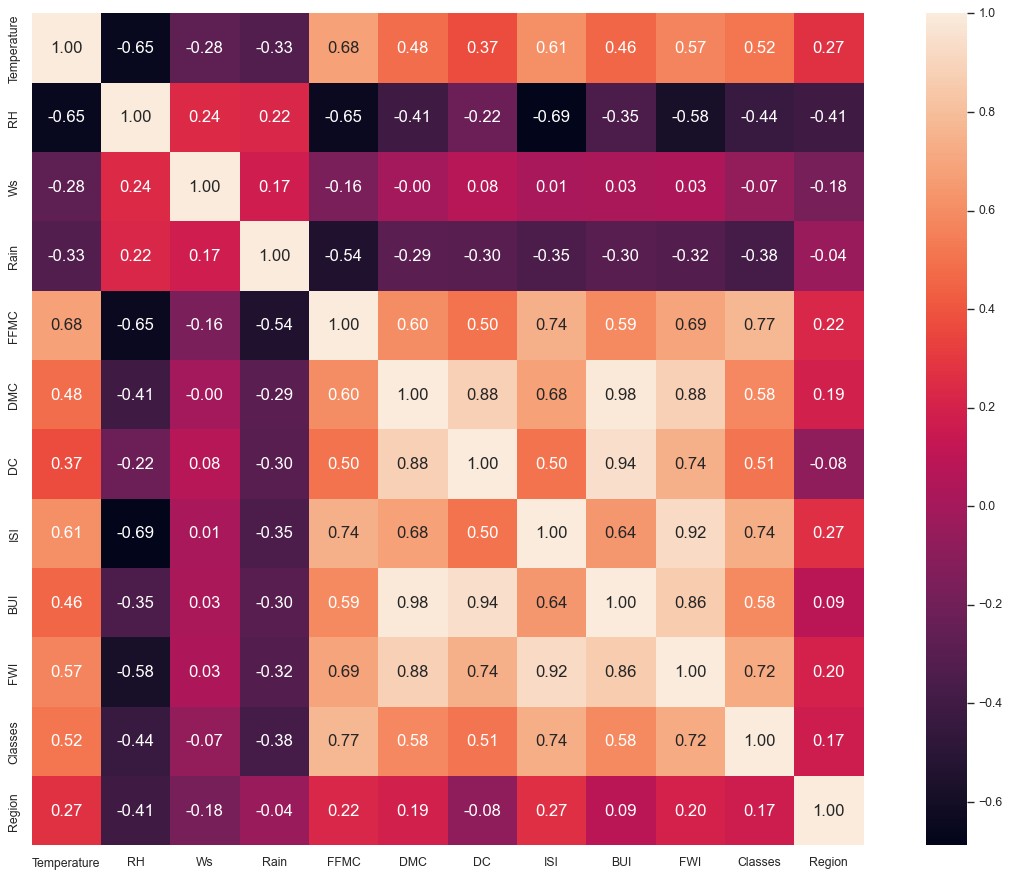

In [34]:
corr1=df1.corr()
sns.set(font_scale=1)
plt.figure(figsize=(20,13))
hm=sns.heatmap(corr1,annot=True,square=True, fmt='.2f', annot_kws={'size': 15})

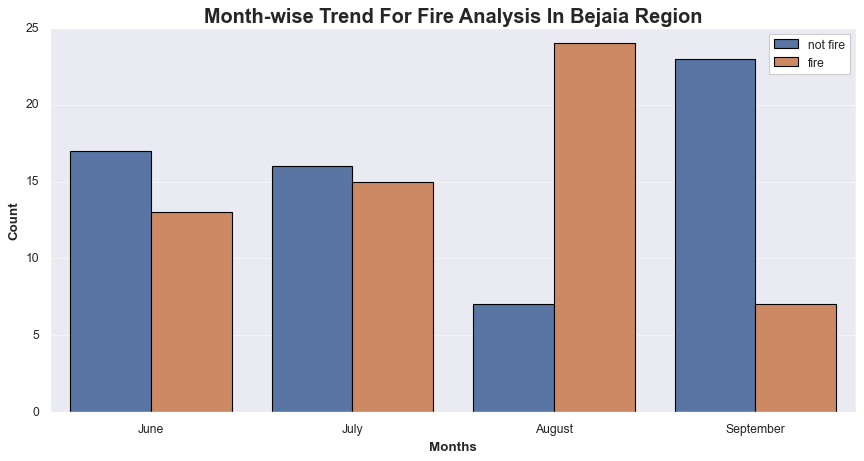

In [35]:

plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= df[df['Region']=='Bejaia'],ec = 'black')
plt.title('Month-wise Trend For Fire Analysis In Bejaia Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()


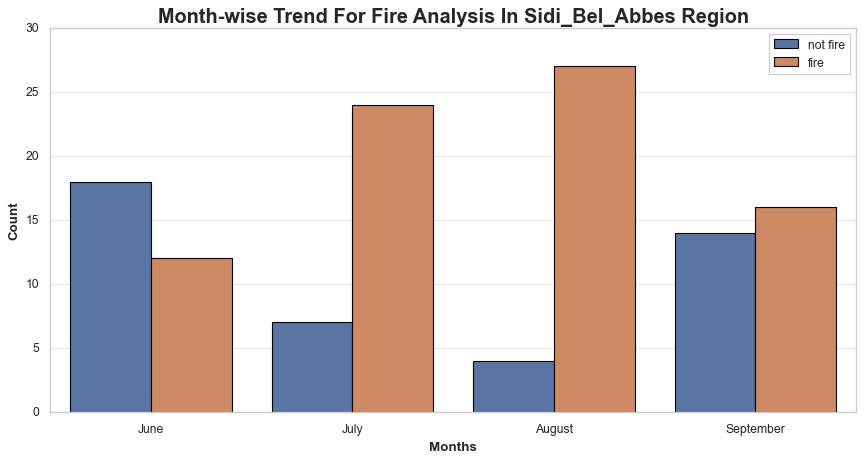

In [36]:
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= df[df['Region']=='Sidi_Bel_Abbes'],ec = 'black')
plt.title('Month-wise Trend For Fire Analysis In Sidi_Bel_Abbes Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

In [37]:
def barchart(var,xlabel):
    plt.figure(figsize=[16,8])
    var_ =  df1.groupby([var], as_index=False)['Classes'].sum()
    ax=sns.barplot(x=var, y="Classes", data=var_)
    ax.set(xlabel=xlabel,ylabel='Fire Count')


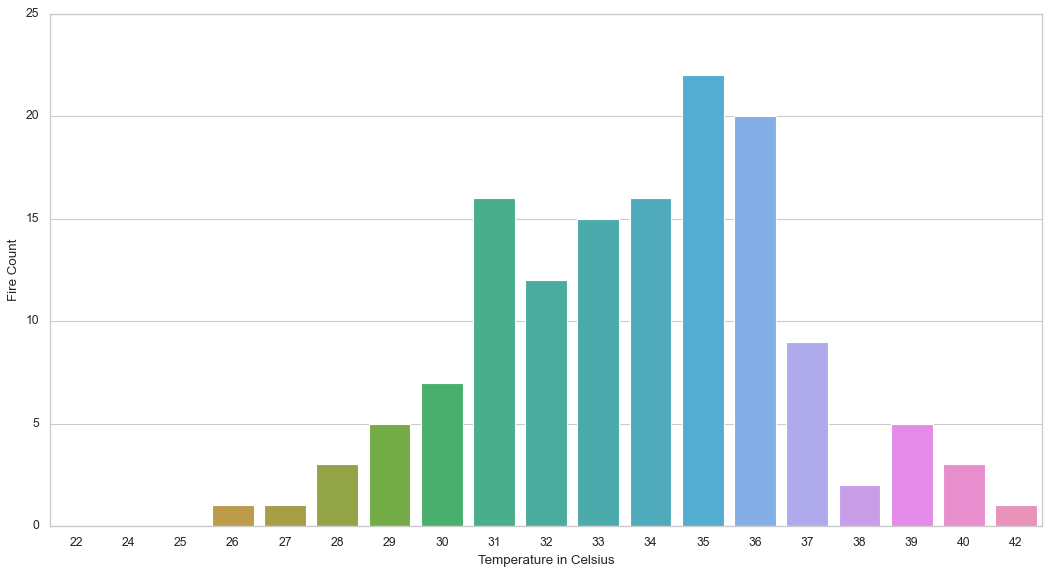

In [38]:
   barchart('Temperature','Temperature in Celsius')

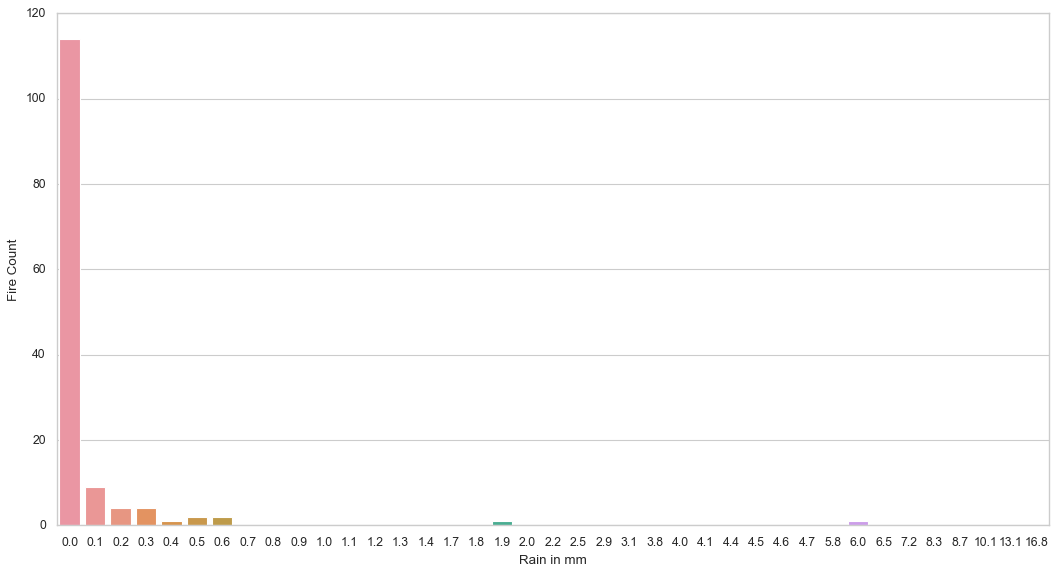

In [39]:
barchart('Rain','Rain in mm')

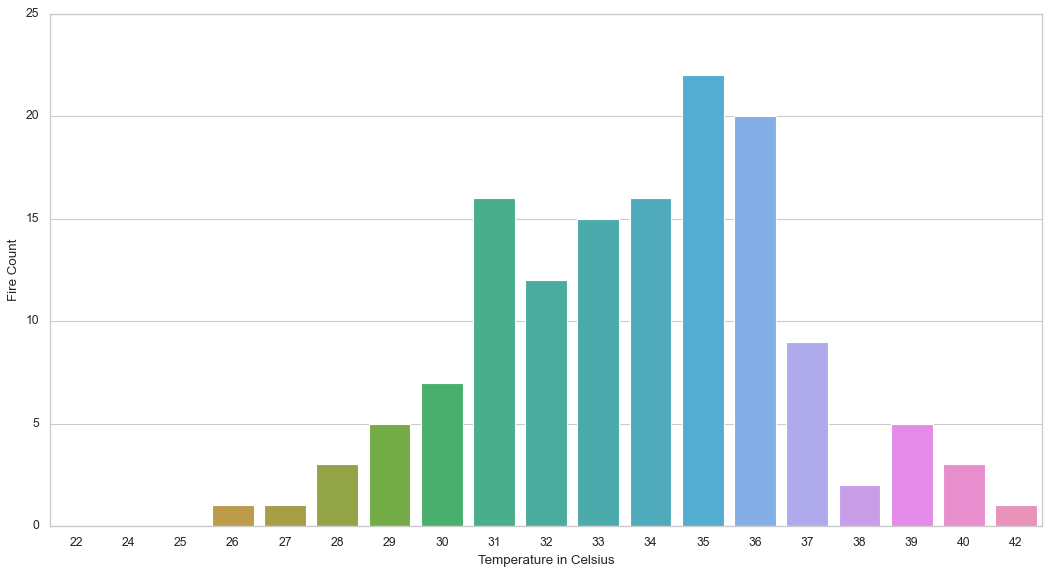

In [40]:
barchart('Temperature','Temperature in Celsius')

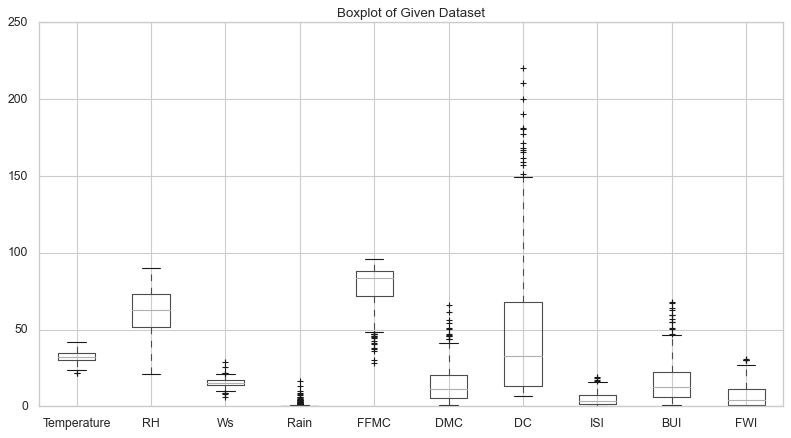

In [41]:
dftemp = df1.drop(['Classes', 'Region'], axis=1)
fig = plt.figure(figsize =(12, 6))
ax = dftemp.boxplot()
ax.set_title("Boxplot of Given Dataset")
plt.show()

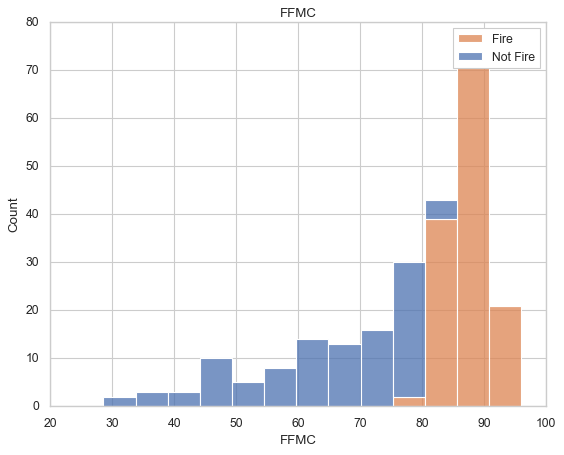

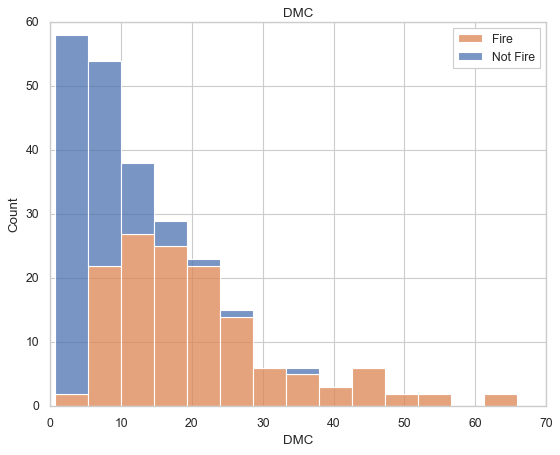

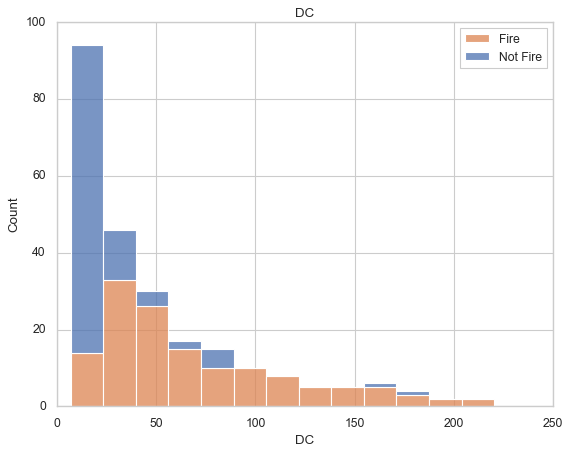

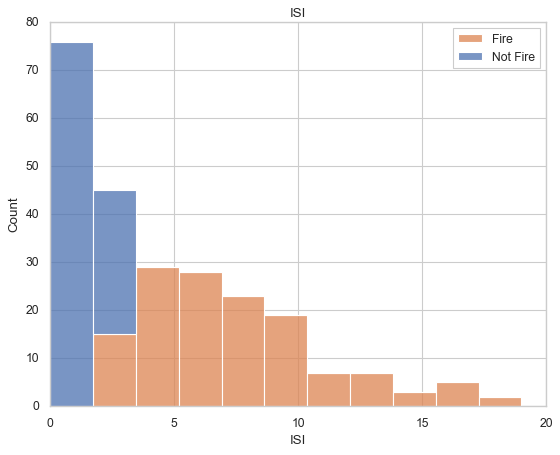

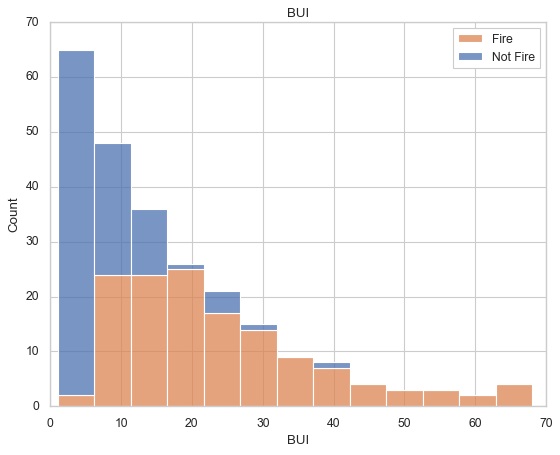

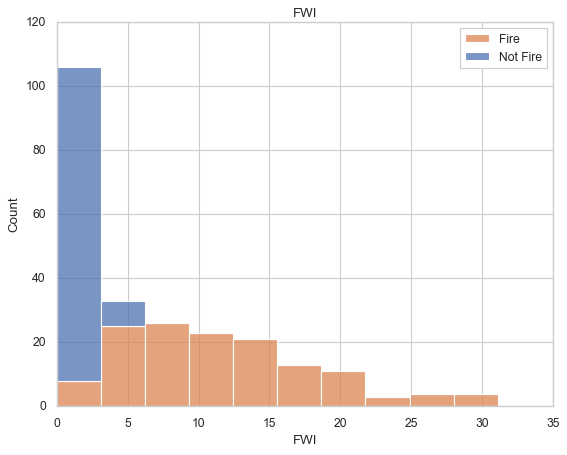

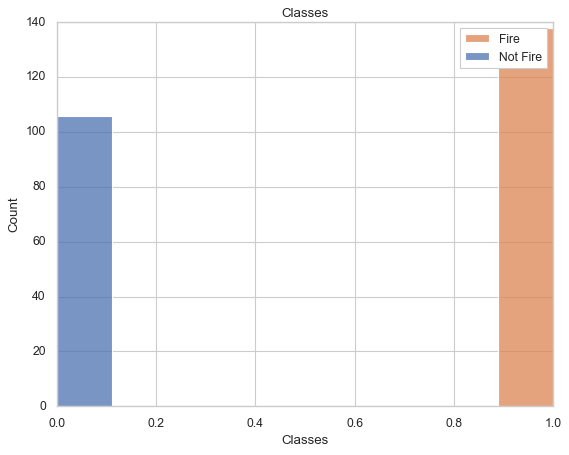

In [42]:
dftemp = dftemp = df1.drop(['Region','Temperature','Rain','Ws','RH'], axis=1)
for feature in dftemp:
    sns.histplot(data = dftemp,x=feature, hue = 'Classes',multiple='stack')
    plt.legend(labels=['Fire','Not Fire'])
    plt.title(feature)
    plt.show()